In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ['OMP_NUM_THREADS'] = '1'

In [7]:
#데이터 리스트: X,Y
data = np.array([[45,3],[9,12],[15,10],[60,5],[21,15]])
data

array([[45,  3],
       [ 9, 12],
       [15, 10],
       [60,  5],
       [21, 15]])

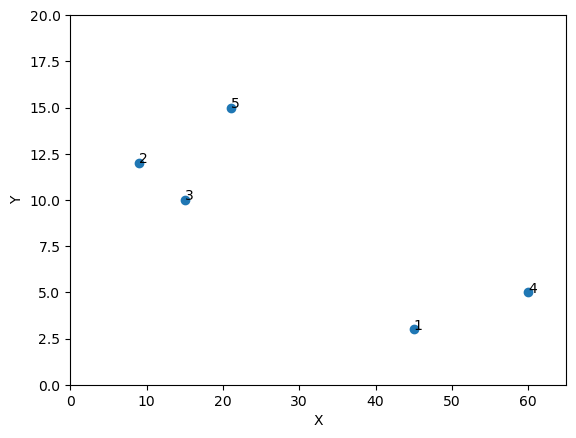

In [9]:
#원데이터의 X,Y 산포도 
plt.scatter(data[:,0], data[:,1])
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(0,65)
plt.ylim(0,20)

#행과 열의 수 
rows, columns = data.shape
#데이터 라벨
for i in range(rows):
    it1 = str(i+1)
    plt.annotate(it1,(data[i,0],data[i,1]))

In [11]:
#데이터표준화
scaler=StandardScaler()
scaler.fit(data)
data_std=scaler.transform(data)
print(data_std)

[[ 0.77521709 -1.35526185]
 [-1.08530393  0.67763093]
 [-0.77521709  0.22587698]
 [ 1.55043418 -0.9035079 ]
 [-0.46513025  1.35526185]]


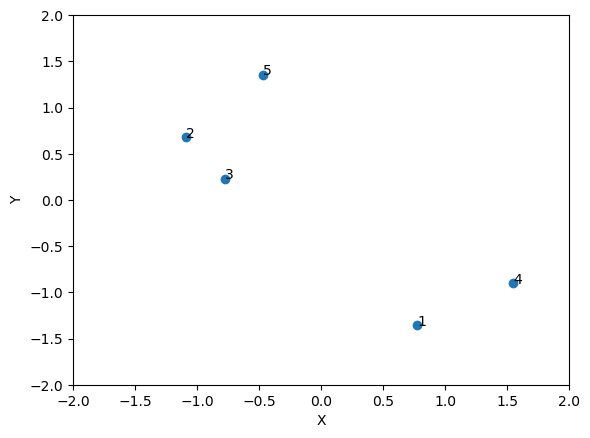

In [13]:
#표준화된 데이터의 X,Y 산포도 
plt.scatter(data_std[:,0], data_std[:,1])
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-2,2)
plt.ylim(-2,2)

#행과 열의 수 
rows, columns = data_std.shape
#데이터 라벨 
for i in range(rows):
    it1 = str(i+1)
    plt.annotate(it1, (data_std[i,0], data_std[i,1]))

In [15]:
#군집의 수를 2개로 하는 군집화 객체
kmeans=KMeans(n_clusters=2)
#2, 3열을 이용한 
kmeans.fit(data_std)
#군집라벨
print(kmeans.labels_)
#군집별 군집 중심
print(kmeans.cluster_centers_)

[1 0 0 1 0]
[[-0.77521709  0.75292325]
 [ 1.16282564 -1.12938488]]


C:\Users\915-13\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


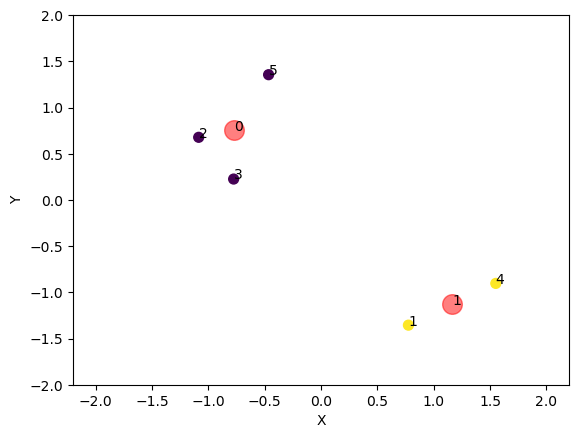

In [17]:
import matplotlib.pyplot as plt

#군집 데이터 분석 
plt.scatter(data_std[:, 0], data_std[:, 1], c=kmeans.labels_, s=50)
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-2.2, 2.2)
plt.ylim(-2, 2)

#행과 열의 수
rows, columns = data_std.shape
#데이터 라벨
for i in range(rows):
    it1 = str(i + 1)
    plt.annotate(it1, (data_std[i, 0], data_std[i, 1]))
#군집중심 표시
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            c='red', s=200, alpha=0.5)
#군집 라벨 
for k in range(kmeans.n_clusters):
    plt.annotate(k, (kmeans.cluster_centers_[k, 0], kmeans.cluster_centers_[k, 1]))

plt.show()

C:\Users\915-13\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\915-13\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\915-13\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\915-13\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

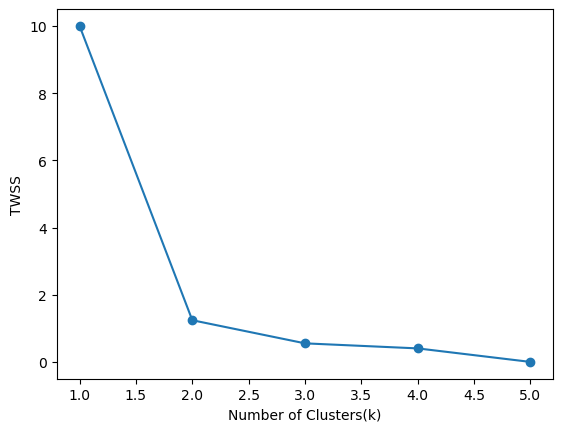

In [21]:
#클러스터 수별 TWSS 값
TWSS={}
#군집 수 1~5까지 반복
for k in range(1,6):
    #군집 수 설정과 군집화 객체 생성
    model=KMeans(n_clusters=k)
    #표준화된 X,Y 데이터에 대한 군집화
    model.fit(data_std)
    #군집 수별 TWSS 값 저장
    TWSS[k]=model.inertia_
#군집 수에 따른 TWSS 그래프
plt.plot(list(TWSS.keys()), list(TWSS.values()), marker='o')
plt.xlabel("Number of Clusters(k)")
plt.ylabel("TWSS")
plt.show()